# HW6:Dijkstra and Kruskal

這次的Dijkstra程式碼邏輯跟上課了解的水平感覺差太多了，

在想要怎麼開始的時候就想了五天左右，

雖然知道Dijkstra的過程是怎樣，

但就好像沒辦法知道要從哪裡開始。

想了很久很久才有一點點進展。

## Dijkstra原理:(Shortest Path)
* Dijkstra可以用來找某個起點到其他每個點的最小Cost。

* 做法:
  先以決定的起點為頭，丟入可以使用的list(取叫used)中，並更改名叫distance這個list中起點到其他點的Cost，
 
  如果當前丟入的所有點無法到達其他某個點時，distance中到那個點的距離設為無限大，
  
  接著挑出distance中距離最小的點丟入used中，接著依序上面重複的動作，(距離=0到丟入的點的距離+丟入的點到他相連的點的距離)
  
  當新丟入的點可以連到的其他點的距離小於當前distance中的距離時，就選擇較小的那個，
  
  而如果新丟入的點並沒有連接到其他的點的話，則保持原本的距離。
  
  接著重複以上的動作直到所有的點都被丟到used當中，此時的distance即表示起點到各點的最小Cost。
  
* 時間複雜度:O(E+VlogV)

## Kruskal:原理(Minimum Spanning Tree)
* Kruskal可以用來找一個Graph中把所有點跑完的最短路徑。
* 作法:先把所有Path的Weight依照大小從小到大排列，並且從小到大挑出，
  
  當我依序把每條Path時要注意Graph不能形成迴圈，所以我要去看一條Path中兩個點的Parent(有沒有從其他點開始到這兩個點)是否相同，
  
  如果相同就代表會形成迴圈，則這條Path不能取，如果不相同則依照設定的規則把其中一個點的Parent也變成另個點的Parent，並取此Path。
  
  所以一開始先把所有點的Parent設為-1(可表示Parent此時為自己)，接著依照上述步驟重複執行，
  
  直到某個點除了本身的Parent為-1外，其餘的點都為這個點本身時，就算結束。
  
  再去看有取出的Path為哪幾條，全部Weight加總就為這個Graph每個點都跑到的最小Weight。
* 時間複雜度:O(ElogV)

## Dijkstra學習歷程
一開始看到rtype是dict的時候，完全看不懂，因為我之前沒學過dict是什麼，

所以我先上網學習了一下dict的用法。

關於Dijkstra的程式碼想了五天還是沒辦法把框架想出來，

因為想不下去了所以就先開始把自己一些想把打出來。

如下(非完整程式碼):

In [ ]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        left_list=[]
        distance_list=[math.inf]*self.V
        V=self.V
        for i in range(self.V):
            if i == s:
                distance_list[i]=0
        #-------------------起始distance_list------------------------
        for z in range(V):
            for j in range(self.V):#用來計算距離 (EX上課範例:如果一開始left中只有1
                if distance_list[j] == min(distance_list):
                    if j not in left_list:
                        left_list.append(j+1)
                        for k in range(self.V):
                            if distance_list[k] == math.inf:
                                if self.graph[j][k] != 0 :
                                    distance_list[k]=self.graph[j][k]
                                else:
                                    pass
                            else:
                                if distance_list[k] <= distance_list[k]+self.graph[j][k]:
                                    distance_list[k]=distance_list[k]
                                else:
                                    distance_list[k]=self.graph[j][k]
                        dict[j]=distance_list[j]
                        del distance_list[j]
                        del self.graph[min(distance_list)][j]
                        self.V=self.V-1
                        print(dict)
                    else:
                        print('ERROR')
                else:
                    pass

            
                                #，現在我要加2進去，所以距離應該會變成for i in graph[2-1]+distance[1-1])
                                #如果大於原本的就不動，小於的話就蓋過去
                                #用來把寫出來的distance_list依序丟入self.graoh_matrix中
                                #最後寫一個for，利用dict去把最後一行的distance_list依序加入dict


首先，為了做出像上課老師所說矩陣，我先查了一次python的infinity的用法，

因為我不知道如何讓infinity用一個可以比較大小的值表達，所以我上網查了一下。

需要import math，運用這套件裡面的math.inf表達。

依照上課所說的，整個程式碼應該要有一個放置s到其他點的目前距離，我稱為distance_list。

接著還要有一個list去存放已經把什麼點使用過了，放置在矩陣的左邊，所以我以left_list代稱。

上課說的矩陣裡面的每一行list就是我所要變動的distance_list，而左邊那個list每多放入一個點，就代表我有多一個點可以使用。

依照整個進行方式，一開始我先寫了一個點s位置為0，其他皆為無限的distance_list，這樣才能讓我的s放入left_list。

(也就是上方註解:distance_list的部分)

為了把點放入left_list，我要找self.graph中數最小的index(代表與點距離最小)放入left_list，這樣就多一個點可以使用。

當left_list放入之後s之後，我就可以把s在self.graph裡面所代表的那行放入，

除了當distance[s]那格要為0，其餘s連不到的點在distance_list中皆保持無限，而連到的就放入self.graph[s]中所代表的距離。

接著找distance_list裡面最小的數的index(這裡叫min)取出放入left_list，為下一個可以使用的點，

在距離判斷會有幾個情況:

* 看distance_list中的數是不是無限，如果distance_list中的數為無限且self.graph([min]也為0，

  則代表一樣沒辦法到達，所以下一個distance_list這個位子一樣是無限。

* distance_list中為無限而self.graph[min]不為0，則要把self.graph[min]加上原本s到min的距離，表示為s到那個點的距離。

* 如果distance_list中不為無限，則要看新的距離是否有比舊的距離大，如果比較大就不改變，如果比較小，則換成新的distance。

接著重複以上的動作直到所有點都進left_list中。

### 錯誤:
這裡我發現了幾個錯誤個錯誤，也是導致我卡了三天的錯誤，

* 因為我一開始找distance_list中最小值的index時，發現迴圈跑了再多次，min一樣不會改變，

  所以我的作法是想說把取出過的min從list中拿掉，接著min就會改變。

  但我發現這樣的話不管在self.graph、distance_list中，都必須改變list的長度，

  不然會出現index out of range的情況，而也不像我所想的只要把self.V每次-1就可以讓list長度-1，

  因為有可能拿掉的index=3或4等，不是依序取出，為了解決這個問題我卡了3天，

  明明知道錯在哪但就不知道怎麼解決，真的很讓人心煩也讓人頭痛。
  
* 在for裡面用太多for會導致我自己在思考的時候邏輯亂掉，所以可能要改掉。

In [ ]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
        self.ans = defaultdict
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        num=[]
        dict={}
        left_list=[]
        distance_list=[math.inf]*self.V
        V=self.V
        for i in range(self.V):
            num.append(i)
            if i == s:
                distance_list[i]=0
        #-------------------起始distance_list------------------------
        while len(left_list) < self.V:
            for j in range(len(num)): #丟到left
                if distance_list[j] == min(distance_list) and j not in left_list:
                    print(j)
                    left_list.append(j)
                    dict[row]=distance_list[j] #位置對的
                    break #重要!


            for k in range(len(num)):   #改distance
                    if distance_list[k] == math.inf:
                        if self.graph[j][k] != 0 :
                            distance_list[k]=self.graph[j][k]
                        else:
                            pass
                    else:
                        if distance_list[k] <= distance_list[k]+self.graph[j][k]:
                            distance_list[k]=distance_list[k]
                        else:
                            distance_list[k]=self.graph[j][k]
            print("a")
            del num[j]

### 解決方法
* 這裡我為了改掉上面所提到問題，我想把寫一個list(這裡叫num)，用來放點，

  也就是說當我把一個點append到left_list中之後，把num中那個點刪掉，

  這樣我只要用for去跑這個num，就可以知道說distance_list中哪些點還在，哪些已經加到left_list中了。

  這裡我感覺我的想法是行得通的，但就像上面說的問題，取出的不會是依照順序，有可能min突然是點4，

  那麼我把4這個點拿掉後，num[index]的值與index會不同，

  因為我在這時候會亂掉不知道是index還是代表的那個點。

* 為了解決一個for裡有太多for的問題，我也換了一個方法去執行迴圈，
  
  當我的left_list中=self.V(代表所有點都已經加入left_list)，才會停止動作，
  
  否則都會執行把點加到left_list及去替換distance_list中的距離的動作。

**上面註解:重要**

如果沒有break出迴圈的化，迴圈會一直往下跑到結束，

這時我的j就不是我要的那個數了。

In [ ]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
        self.ans = defaultdict
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        num=[]
        dict={}
        left_list=[]
        distance_list=[math.inf]*self.V
        V=self.V
        for i in range(self.V):
            num.append(i)
            if i == s:
                distance_list[i]=0
        #-------------------起始distance_list------------------------
        while len(left_list) < self.V:
            for j in num:#丟到left
                if distance_list[j] == min(distance_list) and j not in left_list:
                    print(j)
                    left_list.append(j)
                    dict[j]=distance_list[j] #位置對的
                    break


            for k in range(len(num)):   #改distance
                    if distance_list[k] == math.inf:
                        if self.graph[j][k] != 0 :
                            distance_list[k]=self.graph[j][k]
                        else:
                            pass
                    else:
                        if distance_list[k] <= distance_list[k]+self.graph[j][k]:
                            distance_list[k]=distance_list[k]
                        else:
                            distance_list[k]=self.graph[j][k]
            for c in range(len(num)):
                if num[c]==row:
                    del num[c]
                    del distance_list[row]
            print(dict)

這裡我原本是想說多寫一個for，去解決index跟num中的點會搞混的問題，

但寫了之後發現好像還是解決不了，這時候我又再想有沒有其他方法可以解決min的問題。

In [7]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        a=0
        dict={}
        left_list=[]
        distance_list=[math.inf]*self.V
        for i in range(self.V):
            if i == s:
                distance_list[i]=0
        #-------------------起始distance_list------------------------
        while len(left_list) < self.V:  
            distance_list_modify = sorted(distance_list) #sorted原因
#            print("a=",distance_list)
#            print("b=",distance_list_modify)
            for j in range(self.V): #0-8
                if distance_list[j]==distance_list_modify[a] and j not in left_list:
                    left_list.append(j)
                    print('left_list_append=',j)
#                    print("distance_list=",distance_list)
                    break
            print('---------------------------------------')
            print("更改後")
            print('left_list=',left_list)

            if j == 0 :
                for k in range(self.V): #self.graph[j][k]錯了
                    if distance_list[k] == math.inf:
                        if self.graph[j][k] != 0 :
                            distance_list[k]=self.graph[j][k]
                        else:
                            pass
                    else:
                        if distance_list[k] <= distance_list[k]+self.graph[j][k]:
                            distance_list[k]=distance_list[k]
                        else:
                            distance_list[k]=distance_list[k]+self.graph[j][k]
            else:
                for h in range(self.V):
                    if distance_list[h] == math.inf:
                        if self.graph[j][h] != 0 :
                            distance_list[h]=self.graph[j][h]
                        else:
                            pass
                    else:
                        if distance_list[h] <= distance_list[h]+self.graph[j][h]:
                            distance_list[h]=distance_list[h]
                        else:
                            distance_list[h]=distance_list[h]+self.graph[j][h]
#            self.V=self.V-1
#            print('self.V=',self.V)
            
                print("next_distance_list=",distance_list)

            a+=1

            #self.graph[len(left_list)]=distance_list
#        for h in range(self.V):
#            for l in self.graph[h]:
#                if h>=1 :
#                    if l == 0 :
#                        self.graph[h][l]=self.graph[h-1][l]
#                else:
#                    break
        
        
#        for z in self.graph[-1]:
#            for x in range(self.V):
#                dict[x]=z
#        return dict


這裡我改了很多種方法，都只是為了去解決如何讓min可以依序改變，

而不是永遠都只取出0，後來我想到了一個方法，

如果我每次都把新的distance_list依序排列，並用迴圈去依序取出sort後的list的數，

那麼一定可以依序取出最小、倒數第二、倒數第三.....的數。

於是我寫了一個distance_list_modify去當我sort完的list。

(這裡我上網查了一下sort跟sorted的差別)

(如果用sort除了改變distance_list_modify外，還會改變到原本的distance_lsit)

接著設a等於0，這樣第一次取就是取sort完的distance_list_modify[0]，

每跑一次while也就是要把下一個min的index丟到left_list中，

所以a++。


In [8]:
g=Graph(9)
g.graph=[[0,4,0,0,0,0,0,8,0],
        [4,0,8,0,0,0,0,11,0],
        [0,8,0,7,0,4,0,0,2],
        [0,0,7,0,9,14,0,0,0],
        [0,0,0,9,0,10,0,0,0],
        [0,0,4,14,10,0,2,0,0],
        [0,0,0,0,0,2,0,1,6],
        [8,11,0,0,0,0,1,0,7],
        [0,0,2,0,0,0,6,7,0]
        ]
print("Dijkstra=",g.Dijkstra(0))

left_list_append= 0
---------------------------------------
更改後
left_list= [0]
left_list_append= 1
---------------------------------------
更改後
left_list= [0, 1]
next_distance_list= [0, 4, 8, inf, inf, inf, inf, 8, inf]
left_list_append= 2
---------------------------------------
更改後
left_list= [0, 1, 2]
next_distance_list= [0, 4, 8, 7, inf, 4, inf, 8, 2]
left_list_append= 5
---------------------------------------
更改後
left_list= [0, 1, 2, 5]
next_distance_list= [0, 4, 8, 7, 10, 4, 2, 8, 2]
---------------------------------------
更改後
left_list= [0, 1, 2, 5]
next_distance_list= [0, 4, 8, 7, 10, 4, 2, 8, 2]
left_list_append= 3
---------------------------------------
更改後
left_list= [0, 1, 2, 5, 3]
next_distance_list= [0, 4, 8, 7, 10, 4, 2, 8, 2]
left_list_append= 7
---------------------------------------
更改後
left_list= [0, 1, 2, 5, 3, 7]
next_distance_list= [0, 4, 8, 7, 10, 4, 2, 8, 2]
---------------------------------------
更改後
left_list= [0, 1, 2, 5, 3, 7]
next_distance_list= [0, 4, 8, 7, 

IndexError: list index out of range

這裡漸漸可以跑出答案了，但在前面的distance_list中的數好像就已經出錯了，後面也跑不太出來

所以我去檢查了第一次以後的distance_list那裡的條件(j != 0 那裡)。

## 以下為正解

In [9]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
    def addEdge(self,u,v,w): 
        """
        :type u,v,w: int
        :rtype: None
        """
    def Dijkstra(self, s): 
        """
        :type s: int
        :rtype: dict
        """
        a=0
        dict={}
        left_list=[]
        distance_list=[math.inf]*self.V
        for i in range(self.V):
            if i == s:
                distance_list[i]=0
        #-------------------起始distance_list------------------------
        while len(left_list) < self.V:  
            distance_list_modify = sorted(distance_list) #sorted原因
            for j in range(self.V): #0-8
                if distance_list[j]==distance_list_modify[a] and j not in left_list:
                    left_list.append(j)
                    break
            print('---------------------------------------')
            
            if j == 0 :
                print("第一次")
                for k in range(self.V): #self.graph[j][k]錯了
                    if distance_list[k] == math.inf:
                        if self.graph[j][k] != 0 :
                            distance_list[k]=self.graph[j][k]
                        else:
                            pass
                    else:
                        pass
#                        if distance_list[k] <= distance_list[k]+self.graph[j][k]:
#                            distance_list[k]=distance_list[k]
#                        else:
#                            distance_list[k]=distance_list[k]+self.graph[j][k]
            else:
                print("不是第一次")                          #要退一行
                for h in range(self.V):          #要改
                    if distance_list[h] == math.inf:
                        if self.graph[j][h] != 0 :
                            distance_list[h]=distance_list[j]+self.graph[j][h] #對
                        else:
                            pass
                    else:
                        if self.graph[j][h]!=0:
                            if distance_list[h] > distance_list[j]+self.graph[j][h]:
                                distance_list[h]=distance_list[j]+self.graph[j][h]
                            else:
                                pass
                        else:
                            pass
            print('left_list.append=',j)
            print('distance_list=',distance_list)
            a+=1
        for x in range(self.V):
            dict[str(x)]=distance_list[x]
        return dict

成功了!後來發現是當我跑完第一次改變distance_list後，條件設的不夠詳細，

忘記去看self.graph[j][h]是否為0，才會導致錯誤。

最後我用for把點跟s到點的距離寫入dict。

In [10]:
g=Graph(9)
g.graph=[[0,4,0,0,0,0,0,8,0],
        [4,0,8,0,0,0,0,11,0],
        [0,8,0,7,0,4,0,0,2],
        [0,0,7,0,9,14,0,0,0],
        [0,0,0,9,0,10,0,0,0],
        [0,0,4,14,10,0,2,0,0],
        [0,0,0,0,0,2,0,1,6],
        [8,11,0,0,0,0,1,0,7],
        [0,0,2,0,0,0,6,7,0]
        ]
print("Dijkstra=",g.Dijkstra(0))

---------------------------------------
第一次
left_list.append= 0
distance_list= [0, 4, inf, inf, inf, inf, inf, 8, inf]
---------------------------------------
不是第一次
left_list.append= 1
distance_list= [0, 4, 12, inf, inf, inf, inf, 8, inf]
---------------------------------------
不是第一次
left_list.append= 7
distance_list= [0, 4, 12, inf, inf, inf, 9, 8, 15]
---------------------------------------
不是第一次
left_list.append= 6
distance_list= [0, 4, 12, inf, inf, 11, 9, 8, 15]
---------------------------------------
不是第一次
left_list.append= 5
distance_list= [0, 4, 12, 25, 21, 11, 9, 8, 15]
---------------------------------------
不是第一次
left_list.append= 2
distance_list= [0, 4, 12, 19, 21, 11, 9, 8, 14]
---------------------------------------
不是第一次
left_list.append= 8
distance_list= [0, 4, 12, 19, 21, 11, 9, 8, 14]
---------------------------------------
不是第一次
left_list.append= 3
distance_list= [0, 4, 12, 19, 21, 11, 9, 8, 14]
---------------------------------------
不是第一次
left_list.append= 4
distan

## Dijkstra流程圖:

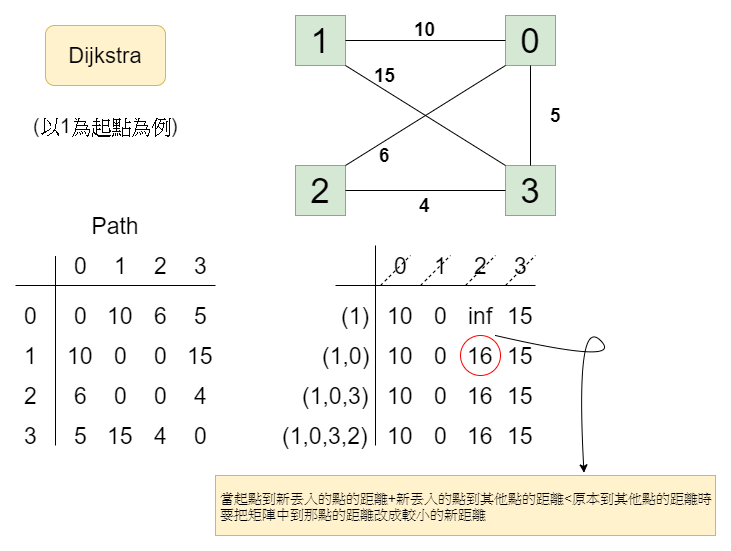

In [2]:
from IPython.display import Image
Image(filename='C:/Users/User/Desktop/Dijkstra.png',height=900,width=500)

## Kruskal:
在這部分的學習歷程只有短短的一個方框，

但實際上這是已經又花了三到四天去構想，

最後突然突然靈光一現把程式碼框架打了出來，

甚至不需要太多的修改就跑出了正確的答案。

在剛開始想的時候，我一直想的是如何去把每個點跟他的root連結，

想過defaultdict、也想過array，而連上後應該怎麼樣去比較root是否相同，如何連接weight，

但想了三四天就是想不出一個完整的架構，這過程中也上網搜尋了很多關於Kruskal的概念，

甚至也查過Pseudocode，但就連Pseudocode都覺得對我來說有點太複雜了看不懂，

所以這時候我就決定回歸原始，把上課的作法直接用程式碼寫出來試試，

於是就有了以下這段程式碼。

(以下先附上程式碼，會在下面講解過程)

In [5]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = []
        self.weight = []
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
    def addEdge(self,u,v,w): 
        self.weight.append([u,v,w])
        self.weight=sorted(self.weight,key=lambda x:x[2]) #重要       

    def Kruskal(self):
        """
        :rtype: dict
        """
#       parent=[-1]*self.V  #一開始的想法
        parent=[]
        dict={}
        for i in range(self.V):
            parent.append(i)
        right=[]
        for vertix in self.weight:
            if parent[vertix[0]] == parent[vertix[1]] :
                print("a")
            else:
                print("b")
                right.append(vertix)
                for j in range(self.V):
                    if parent[j]==parent[vertix[1]]:
                        parent[j]=parent[vertix[0]]
                parent[vertix[1]] ==parent[vertix[0]]
        return right

In [6]:
g = Graph(4)
g.addEdge(0,1,10)
g.addEdge(0,2,6)
g.addEdge(0,3,5)
g.addEdge(1,3,15)
g.addEdge(2,3,4)
g.Kruskal()

b
b
a
b
a


[[2, 3, 4], [0, 3, 5], [0, 1, 10]]

就如同上課的方法，要先把所有路徑依照weight的大小由小排到大，

那麼我必須先把路徑寫入某個list中，所以我把[u,v,w]寫成一個list，

當我要選前面的點時就為list[0]，後面的點為list[1]，weight為list[2]

當我把所有路徑都寫好時，就如同上課做的第一步，要先把這些list依照weight的大小排列，

剛好在寫Dijkstra程式碼時有上網學習了一下sorted的用法，這裡是依照list[2]的大小把所有路徑的list排列。(上方 #重要 處)

接著是要想著如何去寫出全部root原始都為-1的parent，我一開始的想法是上面#處，寫一個list叫parent，

並把裡面依照點的數目填入-1，但後來我把它改成依照點的數去填為parent(也就是自己為自己的parent)，

**重要原因:**

* 因為我在後面要比較兩個點的root是否相同時發現，如果點的parent是-1，這時候就要去把parent當成自己，

  如果每次遇到-1都要這樣做的話，我就一開始先把-1改成自己，這樣比較簡潔，所以我後來改寫parent這個list，

  設定成一開始自己都是自己的parent。

接著我新建了一個list叫right，去存放可以留著的路徑(把形成迴圈的路徑排除)，

接下來就可以去比較每兩個點的parent是否相同，
* 如果兩個點相同的話就表示會形成迴圈，此路徑就不能取。

* 如果不同就把排在後面的那個點的parent設為前面那個點的parent，並且當時parent這個list中如果有其他點的parent一樣是要換掉的，也要一同換掉。

  (注意:要先把其他的換掉再換原本的，否則parent[vertix[0]]會先被蓋掉)
  
比較並改完入right後，return。

(上方print("a")跟print("b")只是為了看迴圈進了哪個條件幾次。)


In [8]:
import math
from collections import defaultdict 
class Graph(): 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = []
        self.weight = []
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)]
    def addEdge(self,u,v,w): 
        self.weight.append([u,v,w])
        self.weight=sorted(self.weight,key=lambda x:x[2]) #重要       

    def Kruskal(self):
        """
        :rtype: dict
        """
        parent=[]
        dict={}
        for i in range(self.V):
            parent.append(i)
        right=[]
        for vertix in self.weight:
            if parent[vertix[0]] == parent[vertix[1]] :
                print("a")
            else:
                print("b")
                right.append(vertix)
                for j in range(self.V):
                    if parent[j]==parent[vertix[1]]:
                        parent[j]=parent[vertix[0]]
                parent[vertix[1]] ==parent[vertix[0]]

        for k in right:
            name='{}-{}'.format(k[0],k[1])
            dict[name]=k[2]               
#           dict[k[0],"-",k[1]]=k[2]
#           dict[k[0]+"-"+k[1]]=k[2]
        
        return dict   

In [9]:
g = Graph(4)
g.addEdge(0,1,10)
g.addEdge(0,2,6)
g.addEdge(0,3,5)
g.addEdge(1,3,15)
g.addEdge(2,3,4)
g.Kruskal()

b
b
a
b
a


{'2-3': 4, '0-3': 5, '0-1': 10}

最後還要把結果新增成一個dict，

這裡也卡了一下下，因為python的基礎不構，所以不知道怎麼樣打出像範例上的那樣的解答，

後來上網爬文、詢問其他同學、試了很多方法後，有了解答。

## Kruskal流程圖:

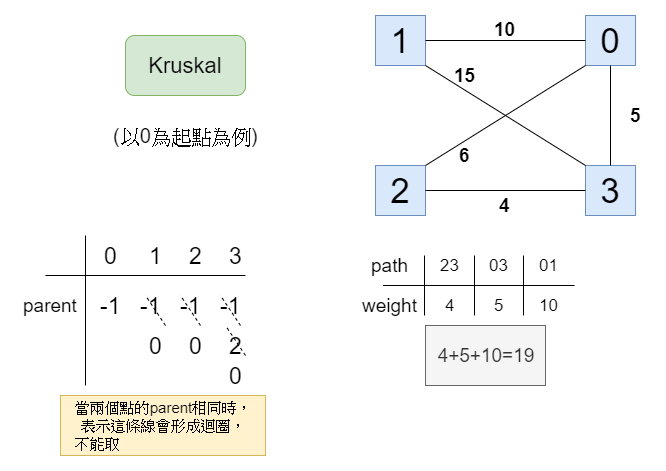

In [3]:
Image(filename='C:/Users/User/Desktop/Kruskal.png',height=500,width=500)

## 心得:
一學期就這樣過去了，這一學期可以說是大學到目前最累也最艱辛的一學期，

即使過程充滿打擊與疲憊，此刻感覺到自己能力的進步算有一點值得了。

雖然逐次用自己會的基礎程式解決每次作業，但總覺得自己基本功還差很遠，

在之後會繼續補齊自己程式方面的漏洞，希望有天我也會到能稍微輕鬆打出code的境界。

謝謝老師跟助教們這學期的付出與努力，雖然作業讓我一路上到處碰壁，

溺水後堅持繼續的作法對自己很殘忍，但現在看來的成長也覺得算值得了。

## 參考資料:
* https://www.runoob.com/python/python-func-sorted.html

* https://www.runoob.com/python/python-dictionary.html

* https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

* https://www.programiz.com/dsa/kruskal-algorithm
